# Exploratory Data Analysis (EDA)

## Importar Librerías

In [2]:
# librerias para analisis de datos y visualizacion
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# libreria para gestion de rutas
from pathlib import Path

# utilidades de paths
from utils.paths import DATA_RAW_DIR, DATA_PROCESSED_DIR, DATA_PREPROCESSED_DIR


## Gestion de paths

In [3]:
# definir ruta de datos no procesados
path_credit_card = DATA_RAW_DIR / "credit_card.xls"
# revisar si el path existe
print(f"El path de datos no procesados {path_credit_card} existe: {path_credit_card.exists()}")


# definir ruta de datos preprocesados
path_credit_card_preprocessed = DATA_PREPROCESSED_DIR / "credit_card_pre.csv"
# revisar si el path existe
print(f"El path de datos preprocesados {path_credit_card_preprocessed} existe: {path_credit_card_preprocessed.exists()}")


# definir ruta de datos procesados
path_credit_card_processed = DATA_PROCESSED_DIR / "credit_card.csv"
# revisar si el path existe
print(f"El path de datos procesados {path_credit_card_processed} existe: {path_credit_card_processed.exists()}")


El path de datos no procesados /Users/jssdev/Dev/Learning/uc/mcd-ml-credit-card/data/raw/credit_card.xls existe: True
El path de datos preprocesados /Users/jssdev/Dev/Learning/uc/mcd-ml-credit-card/data/preprocessed/credit_card_pre.csv existe: False
El path de datos procesados /Users/jssdev/Dev/Learning/uc/mcd-ml-credit-card/data/processed/credit_card.csv existe: False


## Crear el objeto dataframe

In [4]:
# crear dataframe
df_credit_card = pd.read_excel(
    io=path_credit_card,
    sheet_name='Data',
    header=1)

# revisar las primeras filas del dataframe
df_credit_card.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Exploracion del dataframe

In [5]:
# informacion del dataframe
df_credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [6]:
# dimensiones del dataframe
df_credit_card.shape

(30000, 25)

In [7]:
# tipos de datos
df_credit_card.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [8]:
# comprobar si hay datos nulos
df_credit_card.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [9]:
# estadisticos descriptivos del dataframe
df_credit_card.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


### Comentarios 
* El dataframe tiene 30000 filas y 25 columnas.
* Los tipo de datos son int64
* no posee datos nulos

## Análisis y gestión de columnas

In [10]:
# columnas
df_credit_card.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

### Columnas — Default of Credit Card Clients

**Nota sobre moneda**: Todos los montos monetarios están expresados en **NT\$ (Nuevo Dólar de Taiwán, código ISO: TWD)**.

| Columna                        | Descripción                                                             | Valores / Notas                                                                        |
| ------------------------------ | ----------------------------------------------------------------------- | -------------------------------------------------------------------------------------- |
| **ID**                         | Identificador único del cliente                                         | Numérico (no tiene valor predictivo, solo índice)                                      |
| **LIMIT\_BAL**                 | Límite de crédito asignado (incluye crédito individual y suplementario) | Numérico (NT\$)                                                                        |
| **SEX**                        | Género del cliente                                                      | `1 = Hombre`, `2 = Mujer`                                                              |
| **EDUCATION**                  | Nivel educativo                                                         | `1 = Posgrado`, `2 = Universidad`, `3 = Secundaria`, `4 = Otro`, `0/5/6 = No definido` |
| **MARRIAGE**                   | Estado civil                                                            | `1 = Casado/a`, `2 = Soltero/a`, `3 = Otro`, `0 = No definido`                         |
| **AGE**                        | Edad del cliente                                                        | Numérico (años)                                                                        |
| **PAY\_0**                     | Estado de pago en **septiembre 2005**                                   | `-1 = Pago a tiempo`, `1 = atraso 1 mes`, `2 = atraso 2 meses`, …, `9 = 9+ meses`      |
| **PAY\_2**                     | Estado de pago en **agosto 2005**                                       | Mismo formato que **PAY\_0**                                                           |
| **PAY\_3**                     | Estado de pago en **julio 2005**                                        | Mismo formato que **PAY\_0**                                                           |
| **PAY\_4**                     | Estado de pago en **junio 2005**                                        | Mismo formato que **PAY\_0**                                                           |
| **PAY\_5**                     | Estado de pago en **mayo 2005**                                         | Mismo formato que **PAY\_0**                                                           |
| **PAY\_6**                     | Estado de pago en **abril 2005**                                        | Mismo formato que **PAY\_0**                                                           |
| **BILL\_AMT1**                 | Monto facturado en **septiembre 2005**                                  | Numérico (NT\$)                                                                        |
| **BILL\_AMT2**                 | Monto facturado en **agosto 2005**                                      | Numérico (NT\$)                                                                        |
| **BILL\_AMT3**                 | Monto facturado en **julio 2005**                                       | Numérico (NT\$)                                                                        |
| **BILL\_AMT4**                 | Monto facturado en **junio 2005**                                       | Numérico (NT\$)                                                                        |
| **BILL\_AMT5**                 | Monto facturado en **mayo 2005**                                        | Numérico (NT\$)                                                                        |
| **BILL\_AMT6**                 | Monto facturado en **abril 2005**                                       | Numérico (NT\$)                                                                        |
| **PAY\_AMT1**                  | Monto pagado en **septiembre 2005**                                     | Numérico (NT\$)                                                                        |
| **PAY\_AMT2**                  | Monto pagado en **agosto 2005**                                         | Numérico (NT\$)                                                                        |
| **PAY\_AMT3**                  | Monto pagado en **julio 2005**                                          | Numérico (NT\$)                                                                        |
| **PAY\_AMT4**                  | Monto pagado en **junio 2005**                                          | Numérico (NT\$)                                                                        |
| **PAY\_AMT5**                  | Monto pagado en **mayo 2005**                                           | Numérico (NT\$)                                                                        |
| **PAY\_AMT6**                  | Monto pagado en **abril 2005**                                          | Numérico (NT\$)                                                                        |
| **default payment next month** | Variable objetivo: si el cliente cayó en default el mes siguiente       | `1 = Default (incumplimiento)`, `0 = No default`                                       |


In [11]:
# Renombrar columnas a nombres más intuitivos en español
df_credit_card = df_credit_card.rename(columns={
    "ID": "id_cliente",
    "LIMIT_BAL": "limite_credito",
    "SEX": "genero",
    "EDUCATION": "nivel_educativo",
    "MARRIAGE": "estado_civil",
    "AGE": "edad",
    "PAY_0": "estado_pago_sep",
    "PAY_2": "estado_pago_ago",
    "PAY_3": "estado_pago_jul",
    "PAY_4": "estado_pago_jun",
    "PAY_5": "estado_pago_may",
    "PAY_6": "estado_pago_abr",
    "BILL_AMT1": "monto_factura_sep",
    "BILL_AMT2": "monto_factura_ago",
    "BILL_AMT3": "monto_factura_jul",
    "BILL_AMT4": "monto_factura_jun",
    "BILL_AMT5": "monto_factura_may",
    "BILL_AMT6": "monto_factura_abr",
    "PAY_AMT1": "monto_pagado_sep",
    "PAY_AMT2": "monto_pagado_ago",
    "PAY_AMT3": "monto_pagado_jul",
    "PAY_AMT4": "monto_pagado_jun",
    "PAY_AMT5": "monto_pagado_may",
    "PAY_AMT6": "monto_pagado_abr",
    "default payment next month": "default_mes_siguiente"
})

In [12]:
# nuevas columnas
df_credit_card.columns

Index(['id_cliente', 'limite_credito', 'genero', 'nivel_educativo',
       'estado_civil', 'edad', 'estado_pago_sep', 'estado_pago_ago',
       'estado_pago_jul', 'estado_pago_jun', 'estado_pago_may',
       'estado_pago_abr', 'monto_factura_sep', 'monto_factura_ago',
       'monto_factura_jul', 'monto_factura_jun', 'monto_factura_may',
       'monto_factura_abr', 'monto_pagado_sep', 'monto_pagado_ago',
       'monto_pagado_jul', 'monto_pagado_jun', 'monto_pagado_may',
       'monto_pagado_abr', 'default_mes_siguiente'],
      dtype='object')

In [13]:
df_credit_card.head()

,id_cliente,limite_credito,genero,nivel_educativo,estado_civil,edad,estado_pago_sep,estado_pago_ago,estado_pago_jul,estado_pago_jun,...,monto_factura_jun,monto_factura_may,monto_factura_abr,monto_pagado_sep,monto_pagado_ago,monto_pagado_jul,monto_pagado_jun,monto_pagado_may,monto_pagado_abr,default_mes_siguiente
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Variable Objetivo `default_mes_siguiente`

In [14]:
df_credit_card["default_mes_siguiente"].value_counts()

default_mes_siguiente
0    23364
1     6636
Name: count, dtype: int64

### Variables demográficas

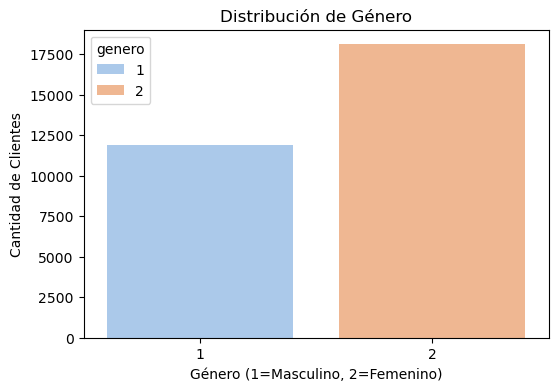

In [15]:
# Grafica de distribución de genero
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(data=df_credit_card, x="genero", palette="pastel", ax=ax, hue="genero", dodge=False)
ax.set_title("Distribución de Género")
ax.set_xlabel("Género (1=Masculino, 2=Femenino)")
ax.set_ylabel("Cantidad de Clientes")
plt.show()

In [16]:
print("Proporción de género:")
print(df_credit_card["genero"].value_counts(normalize=True))

Proporción de género:
genero
2    0.603733
1    0.396267
Name: proportion, dtype: float64


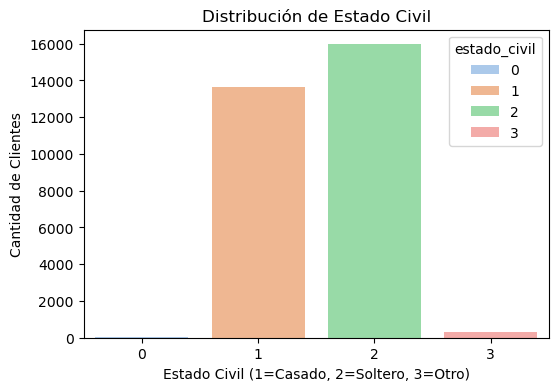

In [17]:
# Grafica distribucion de estado civil
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(data=df_credit_card, x="estado_civil", palette="pastel", ax=ax, hue="estado_civil")
ax.set_title("Distribución de Estado Civil")
ax.set_xlabel("Estado Civil (1=Casado, 2=Soltero, 3=Otro)")
ax.set_ylabel("Cantidad de Clientes")
plt.show()

In [18]:
print("Proporción de estado civil:")
print(df_credit_card["estado_civil"].value_counts(normalize=True))

Proporción de estado civil:
estado_civil
2    0.532133
1    0.455300
3    0.010767
0    0.001800
Name: proportion, dtype: float64


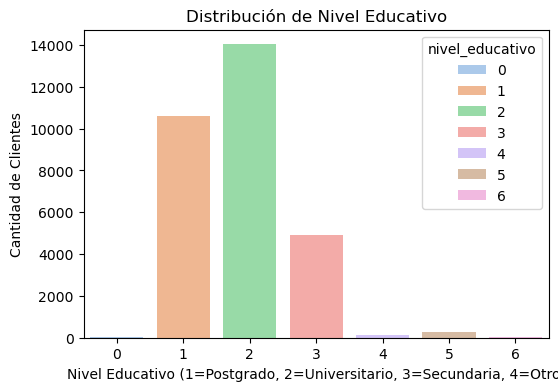

In [19]:
# Grafica de distribucion de nivel educativo
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(data=df_credit_card, x="nivel_educativo", palette="pastel", ax=ax, hue="nivel_educativo")
ax.set_title("Distribución de Nivel Educativo")
ax.set_xlabel("Nivel Educativo (1=Postgrado, 2=Universitario, 3=Secundaria, 4=Otro)")
ax.set_ylabel("Cantidad de Clientes")
plt.show()

In [20]:
print("Proporción de nivel educativo:")
print(df_credit_card["nivel_educativo"].value_counts(normalize=True))

Proporción de nivel educativo:
nivel_educativo
2    0.467667
1    0.352833
3    0.163900
5    0.009333
4    0.004100
6    0.001700
0    0.000467
Name: proportion, dtype: float64


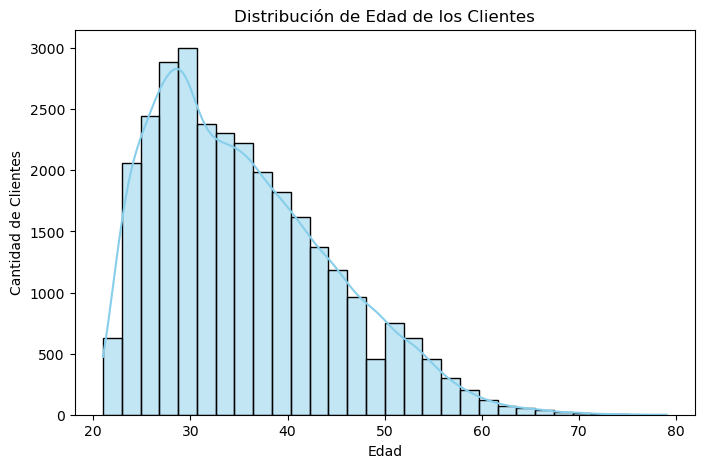

In [21]:
# grafica de distribución de edad
plt.figure(figsize=(8, 5))
sns.histplot(data=df_credit_card, x='edad', bins=30, kde=True, color='skyblue')
plt.title('Distribución de Edad de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Clientes')
plt.show()

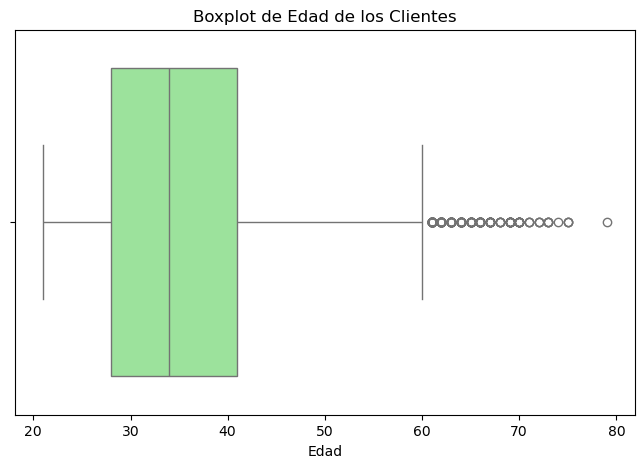

In [22]:
# grafica boxplot de edad
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_credit_card, x='edad', color='lightgreen')
plt.title('Boxplot de Edad de los Clientes')
plt.xlabel('Edad')
plt.show()

### Limite de crédito

In [23]:
df_credit_card['limite_credito'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: limite_credito, dtype: float64

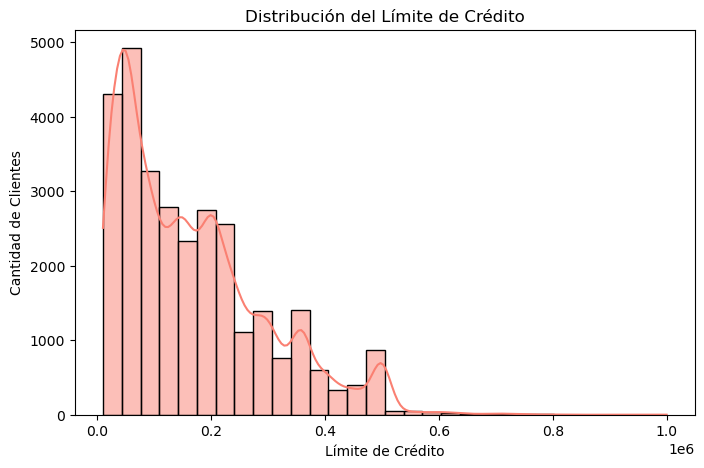

In [24]:
# distribucion del limite de credito
plt.figure(figsize=(8, 5))
sns.histplot(data=df_credit_card, x='limite_credito', bins=30, kde=True, color='salmon')
plt.title('Distribución del Límite de Crédito')
plt.xlabel('Límite de Crédito')
plt.ylabel('Cantidad de Clientes')
plt.show()


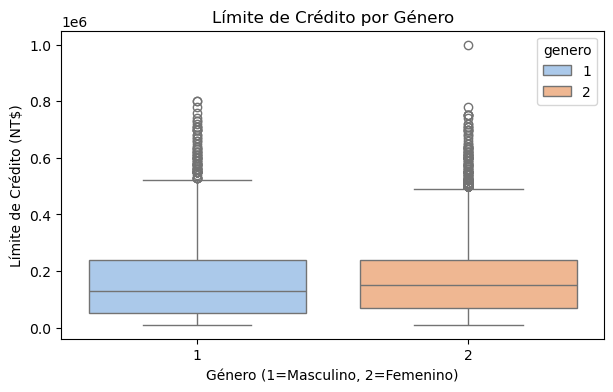

In [25]:
# Por género
plt.figure(figsize=(7,4))
sns.boxplot(x="genero", y="limite_credito", data=df_credit_card, palette="pastel", hue="genero")
plt.title("Límite de Crédito por Género")
plt.xlabel("Género (1=Masculino, 2=Femenino)")
plt.ylabel("Límite de Crédito (NT$)")
plt.show()

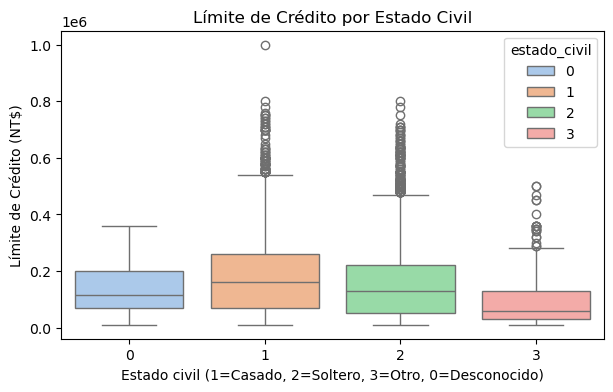

In [26]:
# Por estado civil
plt.figure(figsize=(7,4))
sns.boxplot(x="estado_civil", y="limite_credito", data=df_credit_card, palette="pastel", hue="estado_civil")
plt.title("Límite de Crédito por Estado Civil")
plt.xlabel("Estado civil (1=Casado, 2=Soltero, 3=Otro, 0=Desconocido)")
plt.ylabel("Límite de Crédito (NT$)")
plt.show()

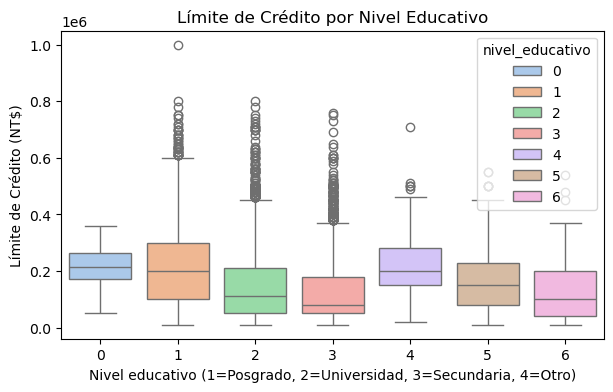

In [27]:
# Por nivel educativo
plt.figure(figsize=(7,4))
sns.boxplot(x="nivel_educativo", y="limite_credito", data=df_credit_card, palette="pastel", hue="nivel_educativo")
plt.title("Límite de Crédito por Nivel Educativo")
plt.xlabel("Nivel educativo (1=Posgrado, 2=Universidad, 3=Secundaria, 4=Otro)")
plt.ylabel("Límite de Crédito (NT$)")
plt.show()

In [28]:
# limite de credito por categorias
df_credit_card['categoria_limite_credito'] = pd.cut(
    df_credit_card['limite_credito'],
    bins=[0, 10000, 70000, 140000, 240000, 500000, 1000000],
    labels=["very_low", "low", "medium", "high", "very_high", "premium"],
    right=True, 
    include_lowest=True
)

# Verificar distribución
print(df_credit_card["categoria_limite_credito"].value_counts())

categoria_limite_credito
low          8739
high         7643
very_high    6861
medium       6058
very_low      493
premium       206
Name: count, dtype: int64


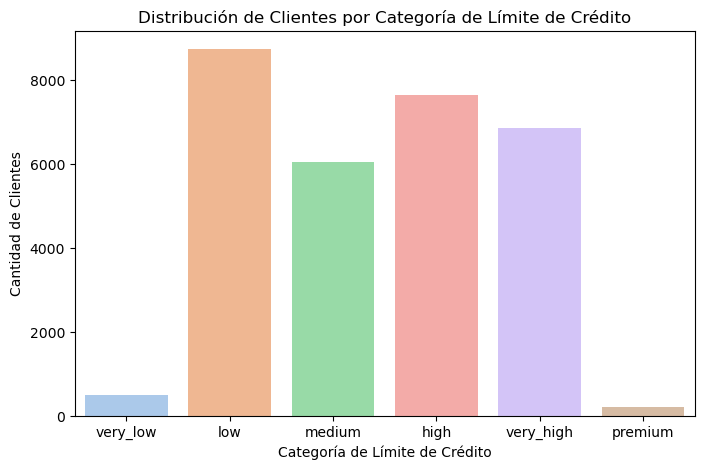

In [29]:
# Distrubucion de clientes por categoria de limite de credito
plt.figure(figsize=(8,5))
sns.countplot(x="categoria_limite_credito", data=df_credit_card, order=["very_low","low","medium","high","very_high","premium"], palette="pastel", hue="categoria_limite_credito")
plt.title("Distribución de Clientes por Categoría de Límite de Crédito")
plt.xlabel("Categoría de Límite de Crédito")
plt.ylabel("Cantidad de Clientes")
plt.show()

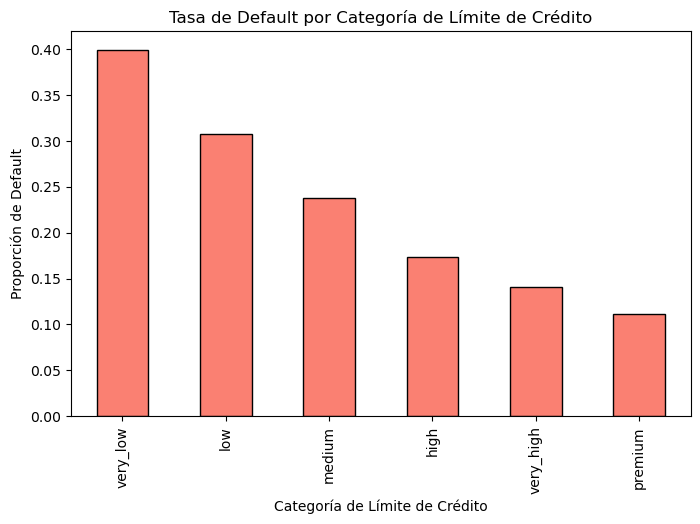

categoria_limite_credito
very_low     0.399594
low          0.307358
medium       0.237537
high         0.173492
very_high    0.140650
premium      0.111650
Name: default_mes_siguiente, dtype: float64


In [30]:
# tasa de default por categoria de limite de credito
default_rates = df_credit_card.groupby("categoria_limite_credito", observed=False)["default_mes_siguiente"].mean().reindex(["very_low","low","medium","high","very_high","premium"])

plt.figure(figsize=(8,5))
default_rates.plot(kind="bar", color="salmon", edgecolor="black")
plt.title("Tasa de Default por Categoría de Límite de Crédito")
plt.ylabel("Proporción de Default")
plt.xlabel("Categoría de Límite de Crédito")
plt.show()

print(default_rates)

### Correlaciones

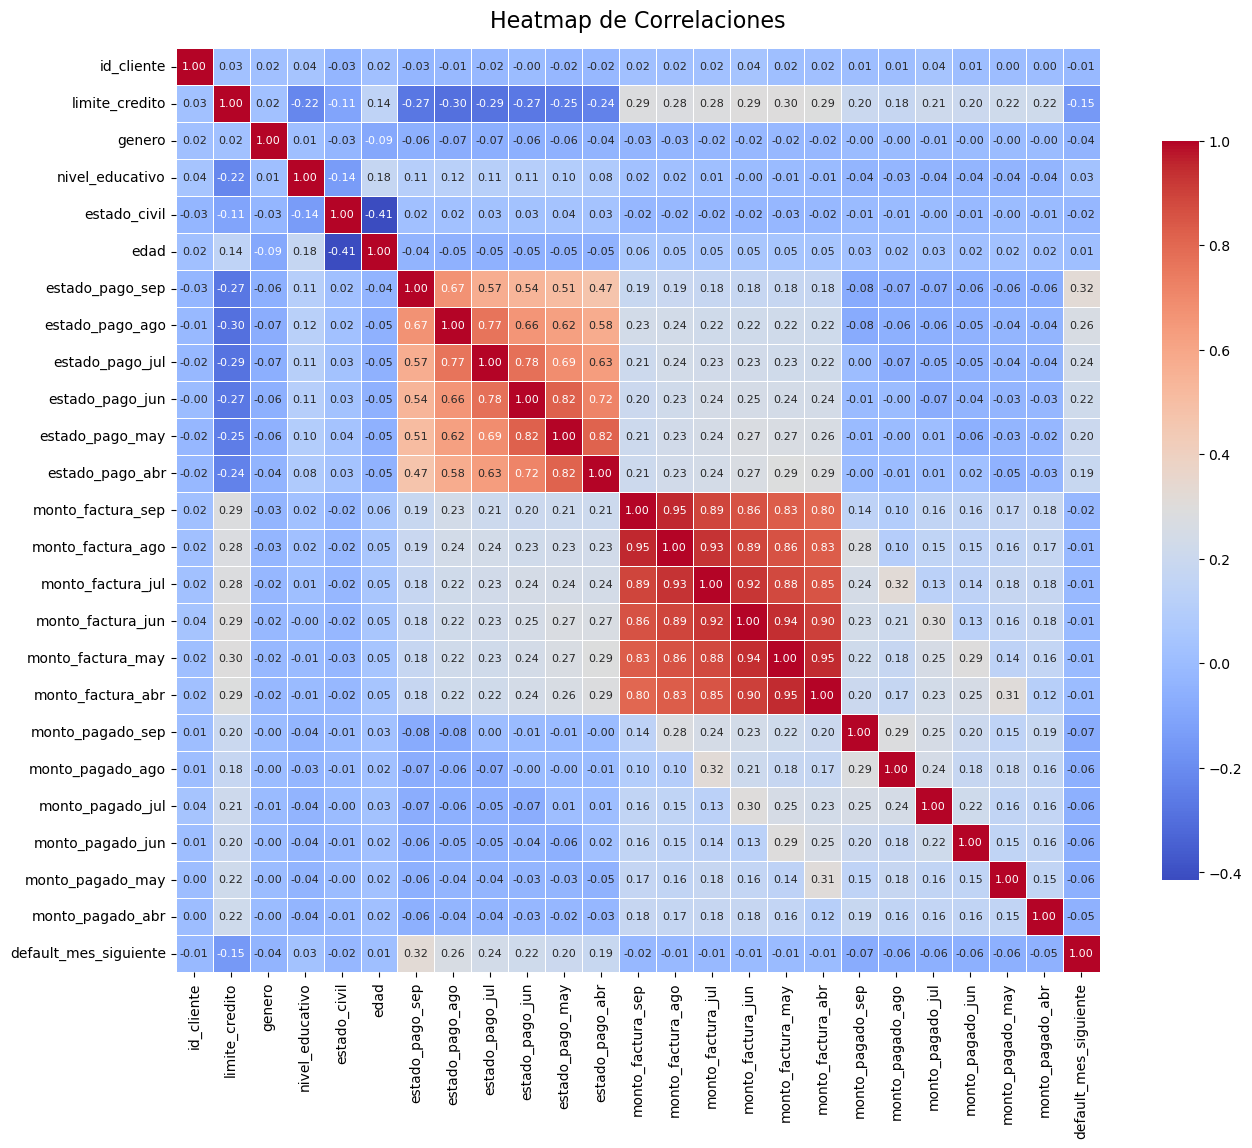

In [31]:
# matriz de correlacion
corr_matrix = df_credit_card.corr(numeric_only=True)

# heatmap de la matriz de correlacion
plt.figure(figsize=(16, 12)) 
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": .8},
    linewidths=.5,
    annot_kws={"size": 8} 
)
plt.title("Heatmap de Correlaciones", fontsize=16, pad=15)
plt.show()

## Relacion con la variable objetivo

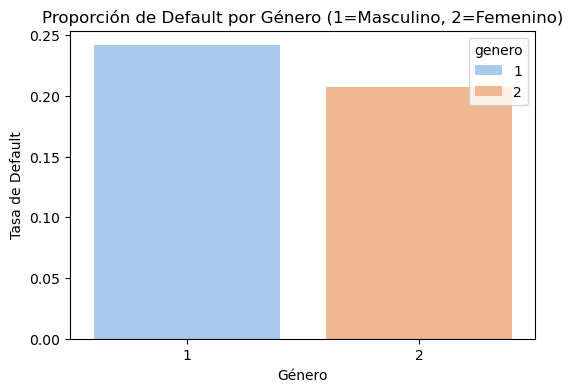

In [32]:
# por genero 
plt.figure(figsize=(6,4))
sns.barplot(
    x="genero", y="default_mes_siguiente",
    data=df_credit_card, palette="pastel", hue="genero", errorbar=None
)
plt.title("Proporción de Default por Género (1=Masculino, 2=Femenino)")
plt.xlabel("Género")
plt.ylabel("Tasa de Default")
plt.show()

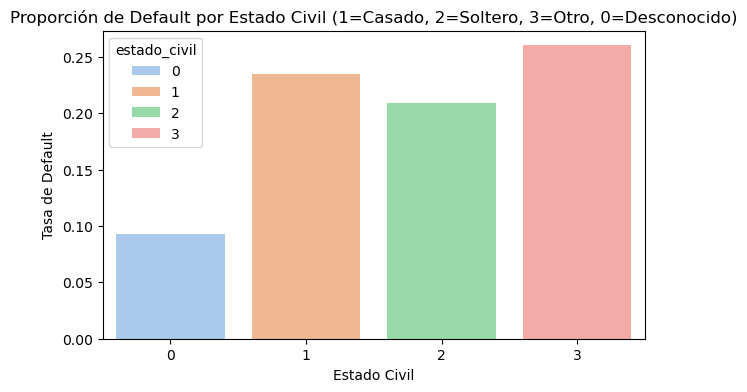

In [33]:
# por estado civil
plt.figure(figsize=(7,4))
sns.barplot(
    x="estado_civil", y="default_mes_siguiente",
    data=df_credit_card, palette="pastel", hue="estado_civil", errorbar=None
)
plt.title("Proporción de Default por Estado Civil (1=Casado, 2=Soltero, 3=Otro, 0=Desconocido)")
plt.xlabel("Estado Civil")
plt.ylabel("Tasa de Default")
plt.show()

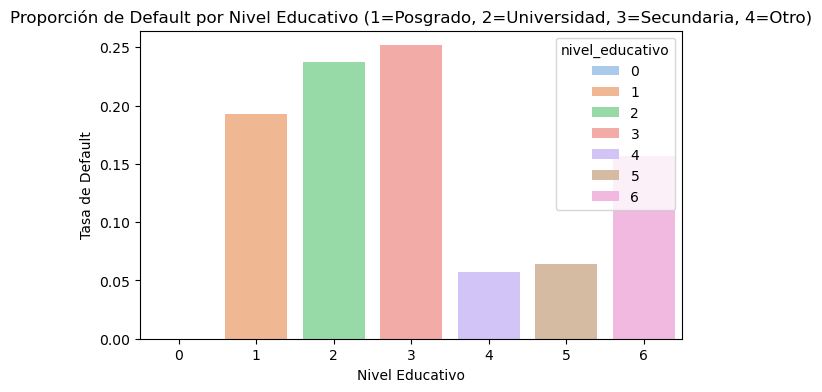

In [34]:
# por nivel educativo
plt.figure(figsize=(7,4))
sns.barplot(
    x="nivel_educativo", y="default_mes_siguiente",
    data=df_credit_card, palette="pastel", hue="nivel_educativo", errorbar=None
)
plt.title("Proporción de Default por Nivel Educativo (1=Posgrado, 2=Universidad, 3=Secundaria, 4=Otro)")
plt.xlabel("Nivel Educativo")
plt.ylabel("Tasa de Default")
plt.show()

In [35]:
df_credit_card['default_mes_siguiente'].unique()

array([1, 0])

/var/folders/_t/h3_2dkhs547fvj9rymbnvxjm0000gn/T/ipykernel_9693/3885087193.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_counts.index, y=default_counts.values, palette='Blues')


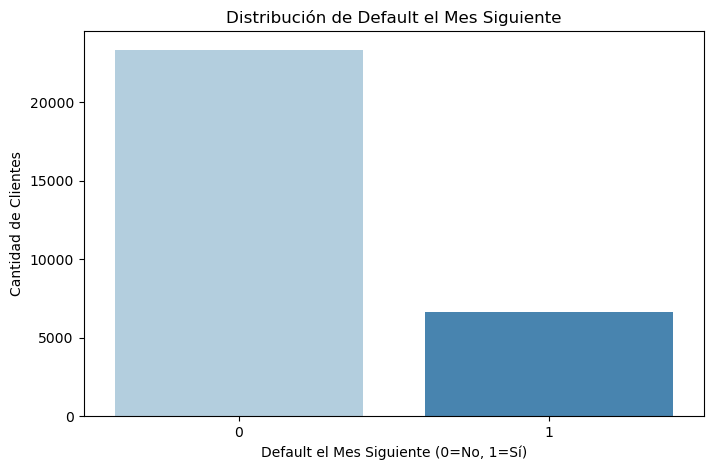

In [36]:
# default mes siguiente distribucion

default_counts = df_credit_card['default_mes_siguiente'].value_counts().sort_index()
plt.figure(figsize=(8,5))
sns.barplot(x=default_counts.index, y=default_counts.values, palette='Blues')
plt.title('Distribución de Default el Mes Siguiente')
plt.xlabel('Default el Mes Siguiente (0=No, 1=Sí)')
plt.ylabel('Cantidad de Clientes')
plt.show()

In [37]:
df_credit_card['edad'].describe()


count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: edad, dtype: float64

In [38]:
df_credit_card.head()

,id_cliente,limite_credito,genero,nivel_educativo,estado_civil,edad,estado_pago_sep,estado_pago_ago,estado_pago_jul,estado_pago_jun,...,monto_factura_may,monto_factura_abr,monto_pagado_sep,monto_pagado_ago,monto_pagado_jul,monto_pagado_jun,monto_pagado_may,monto_pagado_abr,default_mes_siguiente,categoria_limite_credito
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,low
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,medium
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,medium
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,low
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,low


## Principales Insights del Análisis Exploratorio (EDA)

- El dataset contiene 30.000 clientes y 25 variables, con información demográfica, financiera y de comportamiento de pago.
- No existen datos nulos, lo que facilita el análisis y modelado.
- La variable objetivo `default_mes_siguiente` está desbalanceada: la mayoría de los clientes no caen en default.
- El límite de crédito varía ampliamente entre clientes y muestra correlación con variables demográficas como género, estado civil y nivel educativo.

### Recomendaciones y Próximos Pasos

1. **Preprocesamiento:**
   - Estandarizar y/o normalizar variables numéricas.
   - Codificar variables categóricas si es necesario.
   - Analizar el desbalance de la variable objetivo y considerar técnicas de resampling (SMOTE, undersampling, etc.).
2. **Análisis de correlaciones:**
   - Seleccionar variables relevantes para modelos supervisados.
   - Explorar interacciones entre variables demográficas y financieras.
3. **Modelado:**
   - Aplicar modelos de clasificación supervisada (Logistic Regression, Random Forest, XGBoost).
   - Evaluar métricas apropiadas para datos desbalanceados (ROC-AUC, F1-score, etc.).
   - Realizar validación cruzada y ajuste de hiperparámetros.
4. **Aprendizaje no supervisado:**
   - Realizar clustering para identificar segmentos de clientes con riesgo similar.
   - Analizar patrones de comportamiento y perfiles de riesgo.


### Exportar datos a la carpeta pre procesados 

In [40]:
# filtrar y quitar las columnas categoricas para el EDA
df_credit_card_filtered = df_credit_card.drop(columns=['categoria_limite_credito'])
df_credit_card_filtered.head()

,id_cliente,limite_credito,genero,nivel_educativo,estado_civil,edad,estado_pago_sep,estado_pago_ago,estado_pago_jul,estado_pago_jun,...,monto_factura_jun,monto_factura_may,monto_factura_abr,monto_pagado_sep,monto_pagado_ago,monto_pagado_jul,monto_pagado_jun,monto_pagado_may,monto_pagado_abr,default_mes_siguiente
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [43]:
# exportar datos procesados a csv sin las ultimas 2 columnas
df_credit_card_filtered.to_csv(path_credit_card_preprocessed, index=False, encoding='utf-8')